In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ls

gdrive/  sample_data/


In [3]:
cd /content/gdrive/My Drive/Simplon/Mask_Detection

/content/gdrive/My Drive/Simplon/Mask_Detection


In [4]:
ls

Mask_Data/  Mask_Detection.ipynb  model/  model.h5  model.hdf5


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import tqdm
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input
from keras_preprocessing.image import ImageDataGenerator

In [8]:
# Charger les données

Path = '/content/gdrive/MyDrive/Simplon/Mask_Detection/Mask_Data/Mask_Data'
width = 224
height = 224

Data = []
Label = []
l = -1
for i in os.listdir(Path):
  l = l+1
  for j in os.listdir(Path+'/'+i):
    array = cv2.imread(Path+'/'+i+'/'+j)/255
    array = cv2.resize(array,(width,height), interpolation = cv2.INTER_AREA)
    Data.append(array)
    Label.append(l)

Data = np.array(Data)
Label = np.array(Label)
Label = tf.keras.utils.to_categorical(Label)

In [9]:
Data.shape

(1508, 224, 224, 3)

In [10]:
Label.shape

(1508, 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


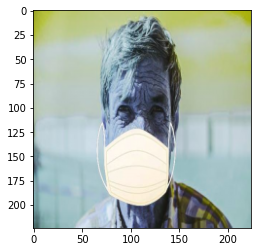

In [11]:
plt.imshow(Data[2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(Data, Label, train_size=0.7, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [13]:
X_train.shape

(1055, 224, 224, 3)

In [14]:
#Data augmentation

train_datagen = ImageDataGenerator(rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

train_generator = train_datagen.flow(X_train, y_train, batch_size=64)

In [15]:
model = tf.keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(224, 224, 3))

for layer in model.layers:
    layer.trainable=True

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)

model = Model(inputs = model.inputs, outputs = output)

17235968/17225924 [==============================] - 0s 0us/step


In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics=['acc'])

In [25]:
# pour les poids HDF5
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.hdf5',
    monitor='val_acc',
    save_best_only=True,
    mode='auto',
)

In [ ]:
# pour le modèle complet h5
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.h5',
    monitor='val_acc',
    save_best_only=True,
    mode='auto',
)

In [ ]:
# pour un modèle sans extension
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model',
    monitor='val_acc',
    save_best_only=True,
    mode='auto',
)

In [26]:
history = model.fit(train_generator,
                    validation_data = [X_valid, y_valid],
                    callbacks=[checkpoint],
                    epochs=2)

Epoch 1/2
17/17 [==============================] - 21s 1s/step - loss: 0.0170 - acc: 0.9934 - val_loss: 0.0289 - val_acc: 0.9823
Epoch 2/2
17/17 [==============================] - 22s 1s/step - loss: 0.0152 - acc: 0.9934 - val_loss: 0.0105 - val_acc: 0.9912


In [ ]:
#pour enregistrer les poids de la derniére epoch
model.save_weigth('model.hdf5')

In [ ]:
#pour enregistrer le modèle de la derniére epoch
model.save_weigth('model.hdf5')

In [5]:
# pour .h5
from keras.models import load_model
model = load_model('model.h5')

In [6]:
# pour .hdf5
model = tf.keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(224, 224, 3))

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)

model = Model(inputs = model.inputs, outputs = output)

model.load_weights('model.hdf5')

17235968/17225924 [==============================] - 0s 0us/step


In [6]:
# pour un fichier
model = tf.keras.applications.MobileNet(include_top=False,weights="imagenet",input_shape=(224, 224, 3))

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(2, activation='softmax')(class1)

model = Model(inputs = model.inputs, outputs = output)

model.load_weights('model')

17235968/17225924 [==============================] - 0s 0us/step


In [7]:
import cv2
import numpy as np
img = cv2.imread('/content/gdrive/MyDrive/Simplon/Mask_Detection/Mask_Data/Mask_Data/with_mask/-110603108-gettyimages-533567012.jpg')
img = cv2.resize(img,(224,224), interpolation = cv2.INTER_AREA)/255
img = np.expand_dims(img, 0)

In [8]:
model.predict(img)

array([[0.9721354 , 0.02786458]], dtype=float32)